[1033.33333333]


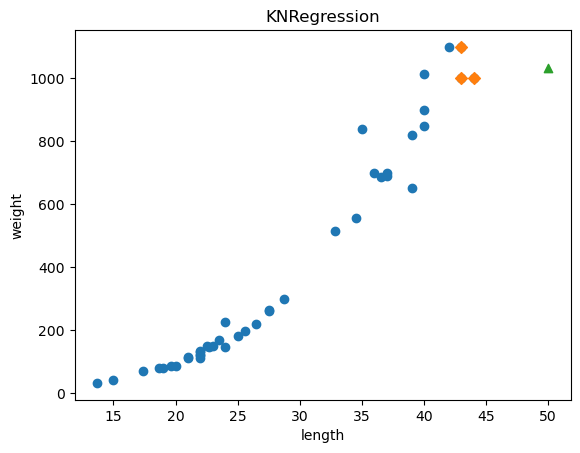

1033.3333333333333
[1033.33333333 1033.33333333 1033.33333333 1033.33333333]


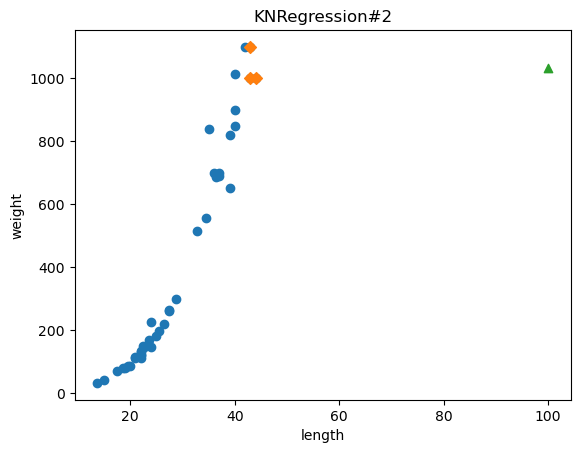

예측치 :  [1241.83860323]
coefficient :  [39.01714496] 
intercept :  -709.0186449535474


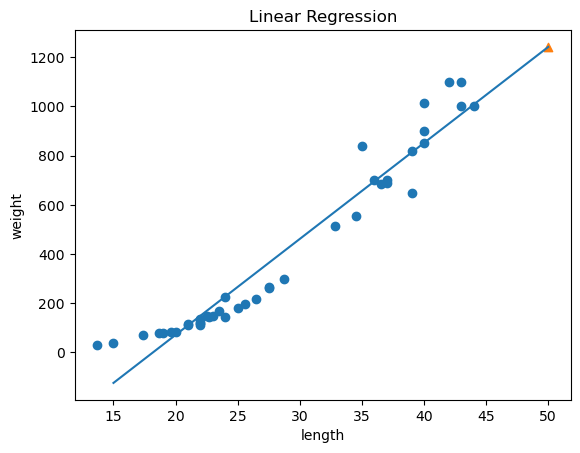

0.9398463339976041
0.824750312331356
(42, 2) (14, 2)
[1573.98423528]
coefficient :  [  1.01433211 -21.55792498] 
intercept :  116.05021078278338


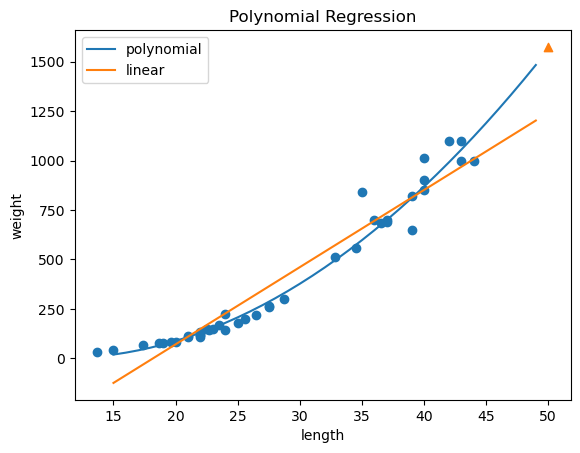

train_set_score :  0.9706807451768623
test_set_score :  0.9775935108325122
(42, 3) (14, 3)
train_set_score :  0.9729178478354533
test_set_score :  0.958836372742297


In [15]:
#limitation of knn_regression
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)
#length is input / weight is target

train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors = 3)     
#train machine using knn_regression algorithm (k = 3)
knr.fit(train_input, train_target)
print(knr.predict([[50]]))


import matplotlib.pyplot as plt
#Specify the new plot with plot.figuire() method is make code more safe when project with someone
plt.figure()
plt.title('KNRegression')
#knr.kneighbors() return k distance from parameter data point and k index of nearest data point
distances, indexes = knr.kneighbors([[50]])
plt.scatter(train_input, train_target)
#show k nearest data points (in this case k is 3 so, show 3 points)
plt.scatter(train_input[indexes], train_target[indexes], marker = 'D')

plt.scatter(50, 1033, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
#Specify the show plot(it means end plot) is make code safer
plt.show()
print(np.mean(train_target[indexes]))

#We can know limitation of KNN_regression algorithm
#KNN_regression algorithm predict value by caculate mean of k nearest data
#Thus, if given data that over the range model predict value, no matter how big given data is, machine will give the same prediction - it is 1033.3333...
print(knr.predict([[100], [200], [300], [50000]]))
#We can solve this problem with linear regression

distance, indexes = knr.kneighbors([[100]])
plt.figure()
plt.title('KNRegression#2')
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker = 'D')
plt.scatter(100, 1033, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()





#use linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
#lr.fit --> linear regression model will find optimal line that best explain the data set
#line is linear equation --> y = ax + b form   (in this example y is a weight, x is length
#actually y and x is given machine is find a and b
#a is called by slope but in machine learning it is called by coefficient or weight(가중치)
#b is called by intercept(when x = 0, b show y intercept)
#coefficient and intercept is contained in lr.coef_ and lr.intercept_ what component of lr instatiation(lr is instantiation of LinearRegression class)
#coef_ and intercept_ ​​found by the machine learning algorithm are called model parameters.
lr.fit(train_input, train_target)
print('예측치 : ', lr.predict([[50]]))
print('coefficient : ', lr.coef_, '\nintercept : ', lr.intercept_)

plt.figure()
plt.title('Linear Regression')
plt.scatter(train_input, train_target)
plt.plot([15,50], [15*lr.coef_ + lr.intercept_, 50*lr.coef_ + lr.intercept_])
#위의 코드는 직선을 그는 코드
#근데 그닥 좋지는 않은 코드 위에서는 (x0, y0), (x1, y1)을 이은 직선을 그리기 위해서 plt.plot([x0, x1], [y0, y1]) 이런 느낌의 코드를 사용한 것이지만.
#차라리 plt.plot(x의 정의역, y = f(x)함수식) 이렇게 표현해서 그리는게 직관적+유지보수에 유리하다.
#first parameter = x_value range
#second parameter = y_value ragne
plt.scatter(50, 1241.8, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

#evluate linear regression model
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))


#Use polynimial regression model
#The important thing is reuse existing feature for train.
#second-oreder polynomial regression
train_poly = np.column_stack((train_input **2, train_input))
#train_input ** 2 make train_input^2
test_poly = np.column_stack((test_input ** 2, test_input))
print(train_poly.shape, test_poly.shape)

lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.predict([[50 ** 2, 50]]))
#given tow feature, first is length square, second is length
#form of function that model find is  y = ax^2 + bx + c (y is weight, x is length)
#so, model find a, b, c
#a, b is contained in lr.coef_, c is contained in lr.intercept_
print('coefficient : ', lr.coef_, '\nintercept : ',  lr.intercept_)

#Make integer array for drawing line each section
plt.figure()
plt.title('Polynomial Regression')
point = np.arange(15,50)
plt.scatter(train_input, train_target)
plt.plot(point, 1.01 * point**2 - 21.6*point + 116.05, label = 'polynomial')
plt.plot(point, 39*point-709, label = 'linear')
plt.scatter(50, 1574, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()
print('train_set_score : ', lr.score(train_poly, train_target))
print('test_set_score : ',lr.score(test_poly, test_target))


#still test socre is higher --> under fitting --> we have to make model more complexer 
#lets make third-order polynomial regression
train_3poly = np.column_stack((train_input**3, train_input**2, train_input))
test_3poly = np.column_stack((test_input **3, test_input**2, test_input))
print(train_3poly.shape, test_3poly.shape)
lr = LinearRegression()
lr.fit(train_3poly, train_target)
print('train_set_score : ', lr.score(train_3poly, train_target))
print('test_set_score : ',lr.score(test_3poly, test_target))

#now train_set_score > test_set_score
#We solve under fitting problem!!
#using high order -> model be more complexer -> it can learn training data more detail -> train_score up!
